In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
df=pd.read_csv('amazon_india_2020.csv')
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2020_00000001,2020-01-19,CUST_2020_00001031,PROD_000402,Xiaomi Poco F1 128GB Blue,Electronics,Smartphones,Xiaomi,36202.67,7.11,33628.52,3,100885.56,0.0,100885.56,Delhi,Delhi,Metro,Standard,55+,UPI,1,Same Day,True,False,NaN,4.5,Cancelled,1,2020,1,0.19,False,3.4
1,TXN_2020_00000002,2020-01-19,CUST_2018_00013266,PROD_000486,Apple iPhone 11 128GB Blue,Electronics,Smartphones,Apple,165163.92,0.00,165163.92,1,165163.92,0.0,165163.92,Ahmedabad,Gujarat,Tier1,Standard,36-45,Net Banking,4,Standard,False,False,NaN,NaN,Returned,1,2020,1,0.19,True,4.3
2,TXN_2020_00000003,2020-01-17,CUST_2020_00001673,PROD_000278,Xiaomi Redmi 4A 16GB White,Electronics,Smartphones,Xiaomi,32906.94,0.00,32906.94,1,32906.94,0.0,32906.94,Chennai,Tamil Nadu,Metro,Standard,36-45,Net Banking,5,Standard,False,False,NaN,5.0,Delivered,1,2020,1,0.21,True,4.1
3,TXN_2020_00000004,2020-01-25,CUST_2020_00026212,PROD_000245,Samsung Galaxy S8+ 32GB Black,Electronics,Smartphones,Samsung,136675.37,45.87,73976.06,1,73976.06,0.0,73976.06,Bhubaneswar,Odisha,Tier2,Premium,18-25,UPI,1,Same Day,True,True,Republic Day Sale,4.5,Delivered,1,2020,1,0.23,True,3.8
4,TXN_2020_00000005,2020-01-01,CUST_2015_00009980,PROD_000765,Vivo V20 64GB Black,Electronics,Smartphones,Vivo,30041.81,0.00,30041.81,1,30041.81,0.0,30041.81,Bangalore,Karnataka,Metro,Standard,46-55,COD,3,Standard,0,False,NaN,4.0,Delivered,1,2020,1,0.23,False,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143710,TXN_2020_00080175_DUP,2020-08-14,CUST_2020_00007573,PROD_001743,Realme Galaxy Tab 8GB RAM Silver,Electronics,Tablets,Realme,75266.67,0.00,75266.67,1,75266.67,0.0,75266.67,Mumbai,Maharashtra,Metro,Standard,26-35,Debit Card,5,Standard,False,False,NaN,4.0,Returned,8,2020,3,0.67,True,4.0
143711,TXN_2020_00010237_DUP,2020-01-18,CUST_2016_00002366,PROD_000304,Vivo V7+ 32GB Blue,Electronics,Smartphones,Vivo,34469.39,0.00,34469.39,2,68938.78,0.0,68938.78,Coimbatore,Tamil Nadu,Tier2,Standard,36-45,COD,6,Standard,False,False,NaN,3.5,Returned,1,2020,1,0.22,True,4.0
143712,TXN_2020_00038556_DUP,2020-04-23,CUST_2020_00045892,PROD_000255,Samsung Galaxy J7 Max 32GB Black,Electronics,Smartphones,Samsung,34026.05,0.00,34026.05,1,34026.05,NaN,34026.05,Bangalore,Karnataka,Metro,Standard,26-35,UPI,1,Same Day,True,False,NaN,NaN,Delivered,4,2020,2,0.16,False,4.7
143713,TXN_2020_00034749_DUP,2020-04-16,CUST_2020_00023707,PROD_001531,HP Gaming 8GB RAM Silver,Electronics,Laptops,HP,136596.96,0.00,136596.96,1,136596.96,0.0,136596.96,Hyderabad,Telangana,Metro,Standard,NaN,UPI,6,Standard,False,False,NaN,4.0,Delivered,4,2020,2,1.98,False,4.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143715 entries, 0 to 143714
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          143715 non-null  object 
 1   order_date              143715 non-null  object 
 2   customer_id             143715 non-null  object 
 3   product_id              143715 non-null  object 
 4   product_name            143715 non-null  object 
 5   category                143715 non-null  object 
 6   subcategory             143715 non-null  object 
 7   brand                   143715 non-null  object 
 8   original_price_inr      143715 non-null  object 
 9   discount_percent        143715 non-null  float64
 10  discounted_price_inr    143715 non-null  float64
 11  quantity                143715 non-null  int64  
 12  subtotal_inr            143715 non-null  float64
 13  delivery_charges        132197 non-null  float64
 14  final_amount_inr    

#Question 1
Your dataset contains order_date in multiple formats: 'DD/MM/YYYY', 'DD-MM-YY', 'YYYY-MM-DD', and some invalid entries like '32/13/2020'. Clean and standardize all dates to 'YYYY-MM-DD' format, handling invalid dates appropriately.


In [3]:
df['order_date']=df['order_date'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
df['order_date']

,order_date
0,2020-01-19
1,2020-01-19
2,2020-01-17
3,2020-01-25
4,2020-01-01
...,...
143710,2020-08-14
143711,2020-01-18
143712,2020-04-23
143713,2020-04-16


In [4]:
df['order_date'].isnull().sum()

np.int64(0)

In [5]:
mask = df['order_date'].str.match(r'^\d{4}-\d{2}-\d{2}$')

df.loc[mask,'order_date']=pd.to_datetime(df.loc[mask, 'order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2020-01-19 00:00:00
1,2020-01-19 00:00:00
2,2020-01-17 00:00:00
3,2020-01-25 00:00:00
4,2020-01-01 00:00:00
...,...
143710,2020-08-14 00:00:00
143711,2020-01-18 00:00:00
143712,2020-04-23 00:00:00
143713,2020-04-16 00:00:00


In [6]:
df['order_date']=pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2020-01-19
1,2020-01-19
2,2020-01-17
3,2020-01-25
4,2020-01-01
...,...
143710,2020-08-14
143711,2020-01-18
143712,2020-04-23
143713,2020-04-16


#Question 2
The original_price_inr column contains mixed data types: numeric values, text with '₹' symbols, comma separators ('₹1,25,000'), and some entries like 'Price on Request'. Clean this column to contain only numeric values in Indian Rupees.


In [7]:
df['original_price_inr']=df['original_price_inr'].str.replace(r'[^\d.]','',regex=True)
df['original_price_inr']=df['original_price_inr'].astype('float')
df['original_price_inr']

,original_price_inr
0,36202.67
1,165163.92
2,32906.94
3,136675.37
4,30041.81
...,...
143710,75266.67
143711,34469.39
143712,34026.05
143713,136596.96


In [8]:
df['original_price_inr'].isnull().sum()

np.int64(0)

#Question 3
Customer ratings appear in various formats: '5.0', '4 stars', '3/5', '2.5/5.0', and some missing values. Standardize all ratings to numeric scale 1.0-5.0, handling inconsistent formats and missing values strategically.


In [9]:
df['customer_rating'].unique()

array(['4.5', nan, '5.0', '4.0', '3.5', '4.5 stars', '5.0 stars', '3.0',
       '3.5 stars', '4', '5/5', '4/5', '5', '4.5/5.0', '4.0 stars',
       '3.0/5.0', '5.0/5.0', '4.0/5.0', '3.5/5.0', '3/5', '3',
       '3.0 stars'], dtype=object)

In [10]:
df['customer_rating']=df['customer_rating'].str.replace(r'[\/ ].*','',case=False,regex=True).str.strip()

In [11]:
df['customer_rating'].isnull().sum()

np.int64(43625)

In [12]:
df['customer_rating']=df['customer_rating'].replace('',np.nan)

In [13]:
df['customer_rating']=df['customer_rating'].astype(float)

In [14]:
df['customer_rating']

,customer_rating
0,4.5
1,NaN
2,5.0
3,4.5
4,4.0
...,...
143710,4.0
143711,3.5
143712,NaN
143713,4.0


In [15]:
df['customer_rating'].isnull().sum()

np.int64(43625)

In [16]:
df['customer_rating'].mean()
# df['customer_rating'].median()
# df['customer_rating'].mode()

np.float64(4.312778499350585)

In [17]:
df['customer_rating']=df['customer_rating'].fillna(df['customer_rating'].mean())

In [18]:
df['customer_rating'].isnull().sum()

np.int64(0)

#Question 4
The customer_city column has inconsistent naming: 'Bangalore/Bengaluru', 'Mumbai/Bombay', 'Delhi/New Delhi', along with spelling errors and case variations. Standardize all city names and handle geographical variations.


In [19]:
df['customer_city'].unique()

array(['Delhi', 'Ahmedabad', 'Chennai', 'Bhubaneswar', 'Bangalore',
       'Patna', 'Mumbai', 'Coimbatore', 'Lucknow', 'Kolkata', 'Indore',
       'Hyderabad', 'Vadodara', 'Pune', 'Visakhapatnam', 'Jaipur',
       'Bareilly', 'Kanpur', 'Ludhiana', 'Meerut', 'Saharanpur', 'Nagpur',
       'Surat', 'Chandigarh', 'Gorakhpur', 'Kochi', 'Varanasi',
       'Allahabad', 'Moradabad', 'Aligarh', 'New Delhi', 'KOLKATA',
       'Banglore', 'delhi', 'kolkata', 'CHENNAI', 'Mumbai ', 'Delhi NCR',
       'MUMBAI', 'mumba', 'Calcutta', 'Bengaluru', 'Bombay', 'chenai',
       'DELHI', 'Kolkata ', 'Chennai ', 'Bengalore', 'Madras',
       'BANGALORE'], dtype=object)

In [20]:
!pip install fuzzywuzzy

In [21]:
from fuzzywuzzy import process  # pip install thefuzz

def clean_city_names(df, column):

    manual_mapping = {
        # Mumbai
        'bombay': 'Mumbai',
        'mumba': 'Mumbai',
        'mumbai ': 'Mumbai',
        'mumabi': 'Mumbai',

        # Bengaluru
        'bangalore': 'Bengaluru',
        'banglore': 'Bengaluru',
        'bengalore': 'Bengaluru',

        # Delhi
        'new delhi': 'Delhi',
        'delhi ncr': 'Delhi',
        'delhi ': 'Delhi',

        # Chennai
        'madras': 'Chennai',
        'chenai': 'Chennai',
        'chennai ': 'Chennai',

        # Kolkata
        'calcutta': 'Kolkata',
        'kolkata ': 'Kolkata',
        'kolkata': 'Kolkata',  # lowercase variant
        'kolkatta': 'Kolkata',
    }

    master_list= [
        'Pune', 'Chandigarh', 'Ludhiana', 'Bengaluru', 'Kochi', 'Mumbai',
        'Kanpur', 'Patna', 'Bhubaneswar', 'Delhi', 'Nagpur', 'Indore',
        'Ahmedabad', 'Chennai', 'Kolkata', 'Gorakhpur', 'Visakhapatnam',
        'Hyderabad', 'Lucknow', 'Varanasi', 'Moradabad', 'Jaipur', 'Surat',
        'Coimbatore', 'Vadodara', 'Meerut', 'Aligarh', 'Bareilly', 'Saharanpur',
        'Allahabad'
    ]
    master_list_lower = [c.lower() for c in master_list]


    df[column] = df[column].astype(str).str.lower().str.strip()
    df[column] = df[column].replace({"nan": pd.NA})

    df[column] = df[column].replace(manual_mapping)

    def match_city(city):
        if pd.isna(city):
            return city
        best_match, score = process.extractOne(city, master_list_lower)
        return best_match if score > 85 else city

    df[column] = df[column].apply(match_city)


    df[column] = df[column].apply(lambda x: x.title() if pd.notna(x) else x)

    return df[column]


/usr/local/lib/python3.12/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [22]:
# Get unique city names
unique_cities = df['customer_city'].unique()

# Apply the cleaning function to unique city names
cleaned_unique_cities = [clean_city_names(pd.DataFrame({'city': [city]}), 'city').iloc[0] for city in unique_cities]

# Create a mapping dictionary
city_mapping = dict(zip(unique_cities, cleaned_unique_cities))

# Map the cleaned names back to the original column
df['customer_city'] = df['customer_city'].map(city_mapping)

display(df['customer_city'].unique())

array(['Delhi', 'Ahmedabad', 'Chennai', 'Bhubaneswar', 'Bengaluru',
       'Patna', 'Mumbai', 'Coimbatore', 'Lucknow', 'Kolkata', 'Indore',
       'Hyderabad', 'Vadodara', 'Pune', 'Visakhapatnam', 'Jaipur',
       'Bareilly', 'Kanpur', 'Ludhiana', 'Meerut', 'Saharanpur', 'Nagpur',
       'Surat', 'Chandigarh', 'Gorakhpur', 'Kochi', 'Varanasi',
       'Allahabad', 'Moradabad', 'Aligarh'], dtype=object)

In [23]:
df['customer_city'].unique()

array(['Delhi', 'Ahmedabad', 'Chennai', 'Bhubaneswar', 'Bengaluru',
       'Patna', 'Mumbai', 'Coimbatore', 'Lucknow', 'Kolkata', 'Indore',
       'Hyderabad', 'Vadodara', 'Pune', 'Visakhapatnam', 'Jaipur',
       'Bareilly', 'Kanpur', 'Ludhiana', 'Meerut', 'Saharanpur', 'Nagpur',
       'Surat', 'Chandigarh', 'Gorakhpur', 'Kochi', 'Varanasi',
       'Allahabad', 'Moradabad', 'Aligarh'], dtype=object)

#Question 5
Boolean columns (is_prime_member, is_prime_eligible, is_festival_sale) contain mixed values: True/False, Yes/No, 1/0, Y/N, and some missing entries. Convert all boolean columns to consistent True/False format.


In [24]:
df['is_prime_member'].unique()

array(['True', 'False', '0', 'FALSE', 'TRUE', 'Yes', 'No', '1'],
      dtype=object)

In [25]:
df['is_prime_eligible'].unique()

array(['False', 'True', '1', 'FALSE', 'Yes', 'TRUE', 'No', '0'],
      dtype=object)

In [26]:
df['is_festival_sale'].unique()

array(['False', 'True', 'FALSE', '0', 'No', 'Yes', '1', 'TRUE'],
      dtype=object)

In [27]:
import pandas as pd

def make_true_false(x):

    if pd.isna(x):
        return pd.NA

    x = str(x).strip().upper()

    if x in ['NAN', 'NONE', 'NULL', '']:
        return pd.NA

    if x in ['NO', 'FALSE', '0']:
        return False
    elif x in ['YES', 'TRUE', '1']:
        return True

    return pd.NA


In [28]:
df['is_festival_sale']=df['is_festival_sale'].apply(make_true_false)
df['is_prime_eligible']=df['is_prime_eligible'].apply(make_true_false)
df['is_prime_member']=df['is_prime_member'].apply(make_true_false)

In [29]:
print(df['is_festival_sale'].unique())
print(df['is_prime_eligible'].unique())
print(df['is_prime_member'].unique())

[False  True]
[False  True]
[ True False]


#Question 6
Product categories have variations: 'Electronics/Electronic/ELECTRONICS/Electronics & Accessories'. Standardize category names across the dataset and ensure consistent naming conventions.


In [30]:
df['category'].unique()

array(['Electronics', 'ELECTRONICS', 'Electronicss', 'Electronic',
       'Electronics & Accessories'], dtype=object)

In [31]:
mapping_cat = {
    'electronics': 'Electronics',
    'electronic': 'Electronics',
    # 'Electronics & Accessories': 'Electronics',
    'ELECTRONICS':'Electronics',
    'Electronic':'Electronics',
    'Electronicss':'Electronics'

}

In [32]:
df['category']=df['category'].replace(mapping_cat)

In [33]:
df['category'].unique()

array(['Electronics', 'Electronics & Accessories'], dtype=object)

#Question 7
The delivery_days column contains negative values, text entries like 'Same Day', '1-2 days', and some unrealistic values like 50 days. Clean this column to contain only valid numeric delivery days.


In [34]:
df['delivery_days'].unique()

array(['1', '4', '5', '3', '6', '15', '2', '0', '-1', '7', '1-2 days',
       'Express', 'Same Day'], dtype=object)

In [35]:
df.loc[df['delivery_days'].str.contains(r'[1-2|same day]',case=False,na=False),'delivery_days'].sample(10)

,delivery_days
786,1
31260,1
15550,1
80346,2
24973,1
7290,1
25190,1
123562,2
81500,1
54149,1


In [36]:
df['delivery_days']=df['delivery_days'].str.replace('1-2','2',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Same Day','1',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Express','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('-','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('2 days','2',case=False)

In [37]:
df['delivery_days'] = df['delivery_days'].replace('', np.nan)
df['delivery_days'] = pd.to_numeric(df['delivery_days'], errors='coerce')
display(df['delivery_days'].unique())

array([ 1.,  4.,  5.,  3.,  6., 15.,  2.,  0.,  7., nan])

In [38]:
df['delivery_days'].isnull().sum()

np.int64(299)

In [39]:
df['delivery_days'] = df['delivery_days'].fillna(df['delivery_days'].mean()).astype(int)

In [40]:
df['delivery_days'].isnull().sum()


np.int64(0)

In [41]:
df['delivery_days'].head()

,delivery_days
0,1
1,4
2,5
3,1
4,3


#Question 8
Identify and handle duplicate transactions where the same customer, product, date, and amount appear multiple times. Some duplicates are genuine (bulk orders) while others are data errors. Develop a strategy to distinguish and handle both cases.


In [42]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
341,TXN_2020_00000342,NaT,CUST_2020_00031761,PROD_001614,Apple VivoBook 4GB RAM Silver,Electronics,Laptops,Apple,171440.11,8.47,156918.14,2,313836.28,0.0,313836.28,Mumbai,Maharashtra,Metro,Standard,36-45,COD,1,Same Day,True,False,NaN,4.000000,Cancelled,1,2020,1,1.98,False,3.2
380,TXN_2020_00000381,2020-01-19,CUST_2020_00043247,PROD_000786,Oppo A52 256GB White,Electronics,Smartphones,Oppo,40389.16,22.52,31292.42,2,62584.84,0.0,62584.84,Mumbai,Maharashtra,Metro,Standard,36-45,UPI,1,Same Day,True,False,NaN,4.312778,Delivered,1,2020,1,0.24,True,4.4
670,TXN_2020_00000671,2020-01-31,CUST_2020_00046302,PROD_000678,Samsung Galaxy S20+ 64GB Blue,Electronics,Smartphones,Samsung,204873.00,0.00,204873.32,1,204873.32,0.0,204873.32,Hyderabad,Telangana,Metro,Premium,55+,UPI,7,Standard,False,False,NaN,5.000000,Delivered,1,2020,1,0.17,False,3.8
781,TXN_2020_00000782,2020-01-24,CUST_2020_00000131,PROD_000189,Xiaomi Redmi 3s 16GB Gold,Electronics,Smartphones,Xiaomi,48821.25,64.39,17383.51,1,17383.51,0.0,17383.51,Patna,Bihar,Tier2,Budget,NaN,Credit Card,4,Standard,False,True,Republic Day Sale,4.312778,Delivered,1,2020,1,0.18,True,3.7
947,TXN_2020_00000948,2020-01-06,CUST_2020_00044914,PROD_000314,Oppo F5 16GB White,Electronics,Smartphones,Oppo,30856.62,8.40,28263.52,1,28263.52,0.0,28263.52,Surat,Gujarat,Tier1,Budget,NaN,COD,4,Standard,False,False,NaN,5.000000,Delivered,1,2020,1,0.21,True,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143710,TXN_2020_00080175_DUP,2020-08-14,CUST_2020_00007573,PROD_001743,Realme Galaxy Tab 8GB RAM Silver,Electronics,Tablets,Realme,75266.67,0.00,75266.67,1,75266.67,0.0,75266.67,Mumbai,Maharashtra,Metro,Standard,26-35,Debit Card,5,Standard,False,False,NaN,4.000000,Returned,8,2020,3,0.67,True,4.0
143711,TXN_2020_00010237_DUP,2020-01-18,CUST_2016_00002366,PROD_000304,Vivo V7+ 32GB Blue,Electronics,Smartphones,Vivo,34469.39,0.00,34469.39,2,68938.78,0.0,68938.78,Coimbatore,Tamil Nadu,Tier2,Standard,36-45,COD,6,Standard,False,False,NaN,3.500000,Returned,1,2020,1,0.22,True,4.0
143712,TXN_2020_00038556_DUP,2020-04-23,CUST_2020_00045892,PROD_000255,Samsung Galaxy J7 Max 32GB Black,Electronics,Smartphones,Samsung,34026.05,0.00,34026.05,1,34026.05,NaN,34026.05,Bengaluru,Karnataka,Metro,Standard,26-35,UPI,1,Same Day,True,False,NaN,4.312778,Delivered,4,2020,2,0.16,False,4.7
143713,TXN_2020_00034749_DUP,2020-04-16,CUST_2020_00023707,PROD_001531,HP Gaming 8GB RAM Silver,Electronics,Laptops,HP,136596.96,0.00,136596.96,1,136596.96,0.0,136596.96,Hyderabad,Telangana,Metro,Standard,NaN,UPI,6,Standard,False,False,NaN,4.000000,Delivered,4,2020,2,1.98,False,4.0


In [43]:
df=df.drop_duplicates(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'],keep='first')

In [44]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating


#Question 9
The dataset contains outlier prices where some products show prices 100x higher than expected due to data entry errors (decimal point issues). Identify and correct these outliers using statistical methods and domain knowledge.


In [45]:
df.loc[:,['product_name','original_price_inr']]

,product_name,original_price_inr
0,Xiaomi Poco F1 128GB Blue,36202.67
1,Apple iPhone 11 128GB Blue,165163.92
2,Xiaomi Redmi 4A 16GB White,32906.94
3,Samsung Galaxy S8+ 32GB Black,136675.37
4,Vivo V20 64GB Black,30041.81
...,...,...
142995,Realme Realme Narzo 10 256GB White,45866.68
142996,Xiaomi Redmi 5A 256GB Black,54445.98
142997,Realme Realme 3 128GB Black,34791.59
142998,Vivo V20 128GB White,44156.98


In [46]:
df['original_price_inr']

,original_price_inr
0,36202.67
1,165163.92
2,32906.94
3,136675.37
4,30041.81
...,...
142995,45866.68
142996,54445.98
142997,34791.59
142998,44156.98


<Axes: >

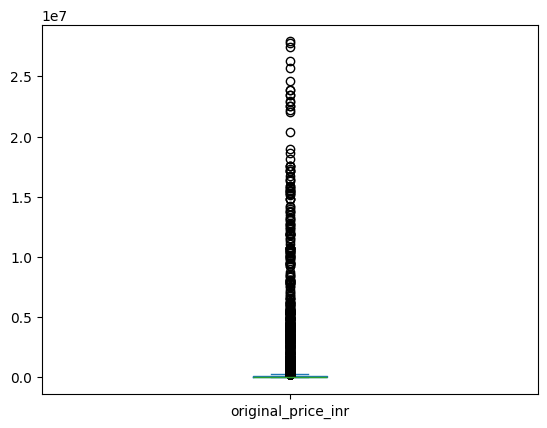

In [47]:
df['original_price_inr'].plot(kind='box')

In [48]:
df['original_price_inr'].describe()

,original_price_inr
count,1.430000e+05
mean,9.956306e+04
std,4.673624e+05
min,1.748760e+03
25%,3.637797e+04
50%,5.406162e+04
75%,1.173206e+05
max,2.790274e+07


In [49]:
Q1=df['original_price_inr'].quantile(0.25)
Q3=df['original_price_inr'].quantile(0.75)
Q3,Q1

(np.float64(117320.59), np.float64(36377.97))

In [50]:
IQR=Q3-Q1
IQR

np.float64(80942.62)

In [51]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [52]:
lower_limit,upper_limit

(np.float64(-85035.95999999999), np.float64(238734.52))

In [53]:
df[((df['original_price_inr'] < lower_limit) | (df['original_price_inr'] > upper_limit))]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
10,TXN_2020_00000011,2020-01-11,CUST_2020_00036441,PROD_000389,OnePlus OnePlus 6T 64GB Black,Electronics,Smartphones,OnePlus,8103463.00,0.00,81034.63,1,81034.63,0.0,81034.63,Coimbatore,Tamil Nadu,Tier2,Standard,46-55,COD,5,Standard,False,False,NaN,4.500000,Delivered,1,2020,1,0.17,True,4.2
40,TXN_2020_00000041,2020-01-06,CUST_2020_00017063,PROD_000352,Apple iPhone XS Max 256GB Black,Electronics,Smartphones,Apple,274094.96,0.00,274094.96,1,274094.96,NaN,274094.96,Kolkata,West Bengal,Metro,Premium,26-35,Debit Card,1,Same Day,True,False,NaN,4.000000,Delivered,1,2020,1,0.17,True,4.6
143,TXN_2020_00000144,2020-01-20,CUST_2020_00005342,PROD_000004,Apple iPhone 6 16GB White,Electronics,Smartphones,Apple,286855.31,48.52,147667.25,1,147667.25,0.0,147667.25,Chennai,Tamil Nadu,Metro,Premium,26-35,Debit Card,1,Same Day,True,True,Republic Day Sale,5.000000,Delivered,1,2020,1,0.21,True,4.1
177,TXN_2020_00000178,2020-01-31,CUST_2020_00046815,PROD_000495,Apple iPhone 11 Pro 128GB Blue,Electronics,Smartphones,Apple,245484.17,0.00,245484.17,1,245484.17,0.0,245484.17,Hyderabad,Telangana,Metro,Premium,46-55,UPI,3,Standard,False,False,NaN,4.500000,Delivered,1,2020,1,0.16,True,3.2
192,TXN_2020_00000193,2020-01-02,CUST_2020_00010102,PROD_000344,Apple iPhone XS 64GB White,Electronics,Smartphones,Apple,240364.61,0.00,240364.61,1,240364.61,0.0,240364.61,Kolkata,West Bengal,Metro,Premium,18-25,Credit Card,1,Same Day,True,False,NaN,4.312778,Delivered,1,2020,1,0.18,True,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142797,TXN_2020_00142798,2020-12-15,CUST_2020_00017065,PROD_000645,Apple iPhone 12 Pro 256GB Black,Electronics,Smartphones,Apple,274046.75,0.00,274046.75,1,274046.75,0.0,274046.75,Mumbai,Maharashtra,Metro,Premium,46-55,Credit Card,1,Same Day,True,False,NaN,4.500000,Delivered,12,2020,4,0.22,False,3.4
142859,TXN_2020_00142860,2020-12-07,CUST_2020_00022385,PROD_000481,Apple iPhone 11 128GB Black,Electronics,Smartphones,Apple,241794.64,27.99,174104.40,1,174104.40,0.0,174104.40,Bengaluru,Karnataka,Metro,Premium,26-35,UPI,1,Same Day,True,False,NaN,5.000000,Delivered,12,2020,4,0.17,False,3.6
142869,TXN_2020_00142870,2020-12-04,CUST_2017_00001465,PROD_000498,Apple iPhone 11 Pro Max 256GB Black,Electronics,Smartphones,Apple,240715.96,0.00,240715.96,1,240715.96,0.0,240715.96,Delhi,Delhi,Metro,Premium,26-35,UPI,1,Same Day,True,False,NaN,4.500000,Delivered,12,2020,4,0.18,True,3.6
142943,TXN_2020_00142944,2020-12-29,CUST_2020_00019041,PROD_000782,Oppo A52 64GB Black,Electronics,Smartphones,Oppo,482634.40,29.63,33962.27,3,101886.82,0.0,101886.82,Bareilly,Uttar Pradesh,Rural,Budget,26-35,Debit Card,7,Standard,False,False,NaN,4.312778,Delivered,12,2020,4,0.16,True,4.4


In [54]:
df=df[(df['original_price_inr']>=lower_limit)&(df['original_price_inr']<=upper_limit)]

In [55]:
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2020_00000001,2020-01-19,CUST_2020_00001031,PROD_000402,Xiaomi Poco F1 128GB Blue,Electronics,Smartphones,Xiaomi,36202.67,7.11,33628.52,3,100885.56,0.0,100885.56,Delhi,Delhi,Metro,Standard,55+,UPI,1,Same Day,True,False,NaN,4.500000,Cancelled,1,2020,1,0.19,False,3.4
1,TXN_2020_00000002,2020-01-19,CUST_2018_00013266,PROD_000486,Apple iPhone 11 128GB Blue,Electronics,Smartphones,Apple,165163.92,0.00,165163.92,1,165163.92,0.0,165163.92,Ahmedabad,Gujarat,Tier1,Standard,36-45,Net Banking,4,Standard,False,False,NaN,4.312778,Returned,1,2020,1,0.19,True,4.3
2,TXN_2020_00000003,2020-01-17,CUST_2020_00001673,PROD_000278,Xiaomi Redmi 4A 16GB White,Electronics,Smartphones,Xiaomi,32906.94,0.00,32906.94,1,32906.94,0.0,32906.94,Chennai,Tamil Nadu,Metro,Standard,36-45,Net Banking,5,Standard,False,False,NaN,5.000000,Delivered,1,2020,1,0.21,True,4.1
3,TXN_2020_00000004,2020-01-25,CUST_2020_00026212,PROD_000245,Samsung Galaxy S8+ 32GB Black,Electronics,Smartphones,Samsung,136675.37,45.87,73976.06,1,73976.06,0.0,73976.06,Bhubaneswar,Odisha,Tier2,Premium,18-25,UPI,1,Same Day,True,True,Republic Day Sale,4.500000,Delivered,1,2020,1,0.23,True,3.8
4,TXN_2020_00000005,2020-01-01,CUST_2015_00009980,PROD_000765,Vivo V20 64GB Black,Electronics,Smartphones,Vivo,30041.81,0.00,30041.81,1,30041.81,0.0,30041.81,Bengaluru,Karnataka,Metro,Standard,46-55,COD,3,Standard,False,False,NaN,4.000000,Delivered,1,2020,1,0.23,False,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142995,TXN_2020_00142996,NaT,CUST_2020_00046734,PROD_000756,Realme Realme Narzo 10 256GB White,Electronics,Smartphones,Realme,45866.68,0.00,45866.68,1,45866.68,0.0,45866.68,Nagpur,Maharashtra,Tier1,Standard,NaN,COD,7,Standard,False,False,NaN,5.000000,Delivered,12,2020,4,0.22,False,4.4
142996,TXN_2020_00142997,NaT,CUST_2015_00007531,PROD_000407,Xiaomi Redmi 5A 256GB Black,Electronics,Smartphones,Xiaomi,54445.98,0.00,54445.98,2,108891.96,0.0,108891.96,Ahmedabad,Gujarat,Tier1,Premium,18-25,Net Banking,1,Standard,False,False,NaN,4.000000,Delivered,12,2020,4,0.23,True,4.6
142997,TXN_2020_00142998,2020-12-30,CUST_2019_00001469,PROD_000579,Realme Realme 3 128GB Black,Electronics,Smartphones,Realme,34791.59,0.00,34791.59,1,34791.59,0.0,34791.59,Mumbai,Maharashtra,Metro,Budget,18-25,Credit Card,4,Standard,False,False,NaN,4.500000,Delivered,12,2020,4,0.21,False,4.5
142998,TXN_2020_00142999,2020-12-15,CUST_2020_00013205,PROD_000768,Vivo V20 128GB White,Electronics,Smartphones,Vivo,44156.98,0.00,44156.98,3,132470.94,0.0,132470.94,Ludhiana,Punjab,Tier2,Budget,36-45,COD,6,Standard,False,False,NaN,4.500000,Delivered,12,2020,4,0.22,True,4.3


#Question 10
Payment methods contain inconsistent naming: 'UPI/PhonePe/GooglePay', 'Credit Card/CREDIT_CARD/CC', 'Cash on Delivery/COD/C.O.D'. Standardize payment method categories and create a clean categorical hierarchy.


In [56]:
df['payment_method'].unique()

array(['UPI', 'Net Banking', 'COD', 'Debit Card', 'Credit Card', 'Wallet'],
      dtype=object)

In [57]:
mapping_payment_method = {
    'COD': 'Cash',
    'UPI': 'UPI',
    'Debit Card': 'Card',
    'Credit Card': 'Card',
    'Net Banking': 'Online Banking',
    'Wallet': 'Wallet',
    'BNPL': 'BNPL'
}

df['payment_method'] = df['payment_method'].replace(mapping_payment_method)

In [58]:
df['payment_method'].unique()

array(['UPI', 'Online Banking', 'Cash', 'Card', 'Wallet'], dtype=object)

In [59]:
df.isnull().sum()

,0
transaction_id,0
order_date,13313
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [60]:
df['delivery_charges'].sample(10)

,delivery_charges
77445,0.0
46946,0.0
100010,0.0
81372,0.0
11703,NaN
95088,0.0
133900,0.0
63160,0.0
18653,NaN
120756,0.0


In [61]:
df['delivery_charges'].isnull().sum()

np.int64(11137)

In [62]:
df['delivery_charges']=df['delivery_charges'].fillna(df['delivery_charges'].mean())

In [63]:
df['customer_age_group'].unique()

array(['55+', '36-45', '18-25', '46-55', '26-35', nan], dtype=object)

In [64]:
mapping_age_group = {
    '18-25': 'Group-1',
    '26-35': 'Group-2',
    '36-45': 'Group-3',
    '46-55': 'Group-4',
    '55+':   'Group-5'
}

df['customer_age_group'] = df['customer_age_group'].replace(mapping_age_group)

In [65]:
df['customer_age_group'].unique()

array(['Group-5', 'Group-3', 'Group-1', 'Group-4', 'Group-2', nan],
      dtype=object)

In [66]:
# df['customer_age_group'].mode()[0]
df['customer_age_group']=df['customer_age_group'].fillna(df['customer_age_group'].mode()[0])

In [67]:
df['customer_age_group'].isnull().sum()

np.int64(0)

In [68]:
df.isnull().sum()

,0
transaction_id,0
order_date,13313
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [69]:
df=df.drop(columns=['festival_name'])

In [70]:
df.isnull().sum()

,0
transaction_id,0
order_date,13313
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139114 entries, 0 to 142999
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   transaction_id          139114 non-null  object        
 1   order_date              125801 non-null  datetime64[ns]
 2   customer_id             139114 non-null  object        
 3   product_id              139114 non-null  object        
 4   product_name            139114 non-null  object        
 5   category                139114 non-null  object        
 6   subcategory             139114 non-null  object        
 7   brand                   139114 non-null  object        
 8   original_price_inr      139114 non-null  float64       
 9   discount_percent        139114 non-null  float64       
 10  discounted_price_inr    139114 non-null  float64       
 11  quantity                139114 non-null  int64         
 12  subtotal_inr            139114 non-

In [73]:
# df.to_csv('cleaned_2020.csv')